# Creating Word Vectors with word2vec

Let's start with NLTK

#### Load Dependencies

In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load Data

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Tokenize Text

In [6]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sent_tokens = sent_tokenize(gutenberg.raw(fileids=['austen-sense.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt']))

In [7]:
gberg_sent_tokens[0:5]

['[Sense and Sensibility by Jane Austen 1811]\n\nCHAPTER 1\n\n\nThe family of Dashwood had long been settled in Sussex.',
 'Their estate was large, and their residence was at Norland Park,\nin the centre of their property, where, for many generations,\nthey had lived in so respectable a manner as to engage\nthe general good opinion of their surrounding acquaintance.',
 'The late owner of this estate was a single man, who lived\nto a very advanced age, and who for many years of his life,\nhad a constant companion and housekeeper in his sister.',
 'But her death, which happened ten years before his own,\nproduced a great alteration in his home; for to supply\nher loss, he invited and received into his house the family\nof his nephew Mr. Henry Dashwood, the legal inheritor\nof the Norland estate, and the person to whom he intended\nto bequeath it.',
 "In the society of his nephew and niece,\nand their children, the old Gentleman's days were\ncomfortably spent."]

In [8]:
gberg_sent_tokens[1]

'Their estate was large, and their residence was at Norland Park,\nin the centre of their property, where, for many generations,\nthey had lived in so respectable a manner as to engage\nthe general good opinion of their surrounding acquaintance.'

In [9]:
word_tokenize(gberg_sent_tokens[1])

['Their',
 'estate',
 'was',
 'large',
 ',',
 'and',
 'their',
 'residence',
 'was',
 'at',
 'Norland',
 'Park',
 ',',
 'in',
 'the',
 'centre',
 'of',
 'their',
 'property',
 ',',
 'where',
 ',',
 'for',
 'many',
 'generations',
 ',',
 'they',
 'had',
 'lived',
 'in',
 'so',
 'respectable',
 'a',
 'manner',
 'as',
 'to',
 'engage',
 'the',
 'general',
 'good',
 'opinion',
 'of',
 'their',
 'surrounding',
 'acquaintance',
 '.']

In [10]:
word_tokenize(gberg_sent_tokens[1])[14]

'the'

In [11]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sents = gutenberg.sents(fileids=['austen-sense.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt'])

In [12]:
gberg_sents[0:5]

[['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'],
 ['CHAPTER', '1'],
 ['The',
  'family',
  'of',
  'Dashwood',
  'had',
  'long',
  'been',
  'settled',
  'in',
  'Sussex',
  '.'],
 ['Their',
  'estate',
  'was',
  'large',
  ',',
  'and',
  'their',
  'residence',
  'was',
  'at',
  'Norland',
  'Park',
  ',',
  'in',
  'the',
  'centre',
  'of',
  'their',
  'property',
  ',',
  'where',
  ',',
  'for',
  'many',
  'generations',
  ',',
  'they',
  'had',
  'lived',
  'in',
  'so',
  'respectable',
  'a',
  'manner',
  'as',
  'to',
  'engage',
  'the',
  'general',
  'good',
  'opinion',
  'of',
  'their',
  'surrounding',
  'acquaintance',
  '.'],
 ['The',
  'late',
  'owner',
  'of',
  'this',
  'estate',
  'was',
  'a',
  'single',
  'man',
  ',',
  'who',
  'lived',
  'to',
  'a',
  'very',
  'advanced',
  'age',
  ',',
  'and',
  'who',
  'for',
  'many',
  'years',
  'of',
  'his',
  'life',
  ',',
  'had',
  'a',
  'constant',
  'companion',
  'and'

In [13]:
gberg_sents[4][14]

'a'

In [14]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [15]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
len(gutenberg.words(fileids=['austen-sense.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt']))

1104978

#### Run Word2Vec

In [16]:
# size == dimensions
# window 10: 20 context words, 10 to the left and 10 to the right
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=2)

In [17]:
# We don't have to save the model if we don't want to. It's being done here as demonstration.
model.save('raw_gutenberg_model.w2v')

#### Explore the Model

In [18]:
model = Word2Vec.load('raw_gutenberg_model.w2v')

In [19]:
model['house']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.3346997 ,  0.1456047 ,  0.0875126 ,  0.16787374,  0.21449646,
        0.02000326, -0.43210667, -0.41061348,  0.12348878, -0.4468959 ,
        0.00587402, -0.11288248, -0.14280792,  0.02595302, -0.2733135 ,
        0.07690801, -0.06747831, -0.37437096,  0.52594775, -0.5403975 ,
       -0.02606335,  0.30052555, -0.00727689, -0.2848628 ,  0.22411096,
       -0.06927806,  0.5047083 , -0.3519361 , -0.4728269 , -0.4474266 ,
        0.25908813, -0.2030207 ,  0.0396525 ,  0.17929295, -0.37270507,
        0.0034474 , -0.11405347, -0.52871686,  0.38637105,  0.03185457,
       -0.1793869 , -0.36775103,  0.03632726,  0.3099345 ,  0.55703264,
        0.23865315, -0.16871358, -0.2827526 ,  0.21554616, -0.1037494 ,
       -0.3958877 ,  0.30340326, -0.368484  , -0.11326298, -0.59801   ,
       -0.11683481,  0.14097637, -0.21227625,  0.10475738, -0.42735082,
        0.41864812, -0.00805139, -0.27151766, -0.03083788], dtype=float32)

In [20]:
len(model['house'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


64

In [21]:
model.most_similar('house')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('cottage', 0.8372372984886169),
 ('court', 0.803726315498352),
 ('carriage', 0.7848597168922424),
 ('dining', 0.7727811336517334),
 ('park', 0.7645359039306641),
 ('parlour', 0.763404369354248),
 ('Exeter', 0.7630621194839478),
 ('Harley', 0.7623587846755981),
 ('Allenham', 0.7569417953491211),
 ('garden', 0.751043438911438)]

In [22]:
model.most_similar('think')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suppose', 0.8765036463737488),
 ('understand', 0.8388917446136475),
 ('remember', 0.8361983299255371),
 ('NOW', 0.8266185522079468),
 ('manage', 0.8230218887329102),
 ('know', 0.8209262490272522),
 ('pretend', 0.8189816474914551),
 ('contradict', 0.8135943412780762),
 ('commit', 0.8134847283363342),
 ('impertinent', 0.8131042718887329)]

In [23]:
model.most_similar('day')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('morning', 0.8524847030639648),
 ('night', 0.7957284450531006),
 ('evening', 0.7444536685943604),
 ('year', 0.7179579734802246),
 ('summer', 0.713690996170044),
 ('work', 0.6924770474433899),
 ('month', 0.686597466468811),
 ('week', 0.6802651286125183),
 ('winter', 0.6785910129547119),
 ('spend', 0.6759383678436279)]

In [24]:
model.most_similar('father')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wife', 0.832089900970459),
 ('master', 0.8259671330451965),
 ('brother', 0.8158612251281738),
 ('cousin', 0.8138773441314697),
 ('mother', 0.8096708059310913),
 ('uncle', 0.798831582069397),
 ('son', 0.7943651080131531),
 ('Maurice', 0.7812618613243103),
 ('child', 0.7681208848953247),
 ('Fanny', 0.7651588916778564)]

In [25]:
model.doesnt_match('mother father daughter house'.split())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'house'

In [26]:
model.similarity('father', 'mother')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8096707348508742

In [27]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.8156519532203674),
 ('brother', 0.7988995909690857),
 ('husband', 0.7883691787719727),
 ('daughter', 0.7804763317108154),
 ('daughters', 0.7554768323898315),
 ('sister', 0.7424092292785645),
 ('Susan', 0.7421820163726807),
 ('Lady', 0.7413530349731445),
 ('Fanny', 0.7360936999320984),
 ('sisters', 0.7356678247451782)]

In [28]:
model.most_similar(positive=['son', 'woman'], negative=['man'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('daughter', 0.8223975896835327),
 ('eldest', 0.774274468421936),
 ('daughters', 0.7649023532867432),
 ('husband', 0.7641652226448059),
 ('brother', 0.7569246292114258),
 ('Lady', 0.7295364737510681),
 ('father', 0.716935932636261),
 ('mother', 0.7110570073127747),
 ('sisters', 0.7087134122848511),
 ('wife', 0.7023751735687256)]

In [29]:
model.most_similar(positive=['husband', 'woman'], negative=['man'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sister', 0.8072625994682312),
 ('mother', 0.8047910928726196),
 ('daughter', 0.7983226180076599),
 ('daughters', 0.7819150686264038),
 ('brother', 0.7792742848396301),
 ('sisters', 0.7625876665115356),
 ('eldest', 0.7458395957946777),
 ('Fanny', 0.7441428899765015),
 ('herself', 0.741320013999939),
 ('Mary', 0.7272416353225708)]

In [30]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=30)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('eldest', 0.7510108947753906),
 ('daughters', 0.729170560836792),
 ('daughter', 0.7054154872894287),
 ('visit', 0.70168137550354),
 ('son', 0.7014639377593994),
 ('widow', 0.6999203562736511),
 ('husband', 0.6955987215042114),
 ('Margaret', 0.6954494714736938),
 ('elder', 0.6943371295928955),
 ('attending', 0.6910567283630371),
 ('lively', 0.6905580163002014),
 ('youngest', 0.6891471147537231),
 ('invited', 0.6847400665283203),
 ('wife', 0.6826975345611572),
 ('Middleton', 0.6800143718719482),
 ('provided', 0.6775442361831665),
 ('Fanny', 0.674283504486084),
 ('Sicily', 0.671622097492218),
 ('Lady', 0.6700534820556641),
 ('wrote', 0.6696280241012573),
 ('charity', 0.6691582202911377),
 ('robbed', 0.6691069602966309),
 ('taught', 0.6660434007644653),
 ('John', 0.6659883856773376),
 ('mother', 0.6648327112197876),
 ('health', 0.6640120148658752),
 ('industrious', 0.6635658144950867),
 ('Exeter', 0.661763608455658),
 ('Robert', 0.6609779000282288),
 ('Gray', 0.6604912281036377)]

#### Reduce word vector dimensionality with t-SNE

t-Distributed Stochastic Name Embedding

In [31]:
len(model.wv.vocab)

11319

In [32]:
X = model[model.wv.vocab]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [33]:
tsne = TSNE(n_components=2, n_iter=250)

In [34]:
X_2d = tsne.fit_transform(X)

In [35]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [36]:
coords_df.head()

,x,y,token
0,0.274352,1.097013,[
1,0.269447,-0.350382,and
2,0.030642,-0.150067,by
3,0.272640,1.096708,]
4,0.284099,1.090458,CHAPTER


In [37]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualise 2D representation of word vectors

In [38]:
coorrds_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [39]:
coords_df.head()

,x,y,token
0,0.274352,1.097013,[
1,0.269447,-0.350382,and
2,0.030642,-0.150067,by
3,0.272640,1.096708,]
4,0.284099,1.090458,CHAPTER


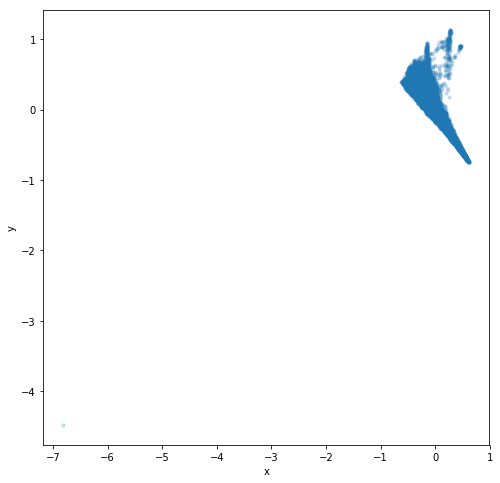

In [40]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8,8), marker='o', s=10, alpha=0.2)

In [41]:
output_notebook()

Loading BokehJS ...

In [42]:
subset_df = coords_df.sample(n=1000)

In [43]:
p = figure(plot_width=600, plot_height=600)
p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

GlyphRenderer(id='3a2474a4-7a55-4ddf-89e5-65bfb748ec34', ...)

In [44]:
show(p)